# In this Jupyter notebook I will analyse the data from the microarray dataset of Szilagyi et al. (2012) and Garg et al (2015) to see how the fkh2 deletion behaves.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

root = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"

In [24]:
#/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Analysis of microarray datasets/szilagyi_final.csv
szilagyi = pd.read_csv(root + 'Bence folder/Analysis of microarray datasets/szilagyi_final.csv', index_col=0)
#This is the processed file whre ratios are calculate already by normalising with the WT measurement
garg1 = pd.read_table(root + 'external data/Garg et al 2015/nar-00003-x-2015-File008 3.cdt', sep='\t')


In [13]:

garg1 = garg1[['NAME'] + [col for col in garg1.columns if 'WT' in col or 'fkh2' in col]]
#find SPBC317.01
#remove nan
garg1 = garg1.dropna(subset=['NAME'])
garg1[garg1['NAME'].str.contains('SPBC317.01')]


,NAME,fkh2::ura4+_10hr_HU/ura4+_10Hr_HU,fkh2::ura4+_6hr/ura4+_6Hr,fkh2::ura4+_8hr/ura4+_8Hr,fkh2::ura4+_10hr/ura4+_10Hr,fkh2::ura4+_12hr/ura4+_12Hr
4795,SPBC317.01,0.228,-0.514,-1.266,-1.081,-0.3745


In [14]:
#merge garg1 and szilagyi on NAME and gene respectively
#szilagyi only keep gene, wt_fkh2d and wt_fkh2s2a
szilagyi = szilagyi[['gene', 'wt_fkh2d', 'wt_fkh2s2a']]
final = pd.merge(garg1, szilagyi, left_on='NAME', right_on='gene', how='inner')
#remove gene
final = final.drop(columns=['gene'])


In [15]:
#in 2-6. columns remove / and whats after it. Also put (Garg et al. 2015) in the end
final.columns = [col.split('/')[0] + ' (Garg et al. 2015)' if '/' in col else col for col in final.columns]
#in col 7 and 8 remove wt_ from start and add (Szilagyi et al. 2012) at the end
final.columns = [col.replace('wt_', '') + ' (Szilagyi et al. 2012)' if 'wt_' in col else col for col in final.columns]
final



,NAME,fkh2::ura4+_10hr_HU (Garg et al. 2015),fkh2::ura4+_6hr (Garg et al. 2015),fkh2::ura4+_8hr (Garg et al. 2015),fkh2::ura4+_10hr (Garg et al. 2015),fkh2::ura4+_12hr (Garg et al. 2015),fkh2d (Szilagyi et al. 2012),fkh2s2a (Szilagyi et al. 2012)
0,SPAC1486.08,0.4895,-0.4995,0.4275,-0.0140,0.1275,0.711542,-0.108117
1,SPAC29A4.03c,0.4080,-0.3895,0.3605,-0.2010,-0.2130,0.483648,0.251017
2,SPAC23C4.06c,1.0500,-1.0980,0.0350,-0.2200,-0.9315,0.524571,0.025845
3,SPBC14F5.09c,0.9420,-0.5055,0.3015,0.2110,-0.3430,-0.089963,-0.007992
4,SPBC2G2.13c,0.4465,-0.5105,0.2055,0.3140,-0.0885,0.164662,0.324897
...,...,...,...,...,...,...,...,...
4991,SPBPJ4664.06,-0.4720,0.2640,0.2160,0.4265,0.1765,0.806400,1.028721
4992,SPCC594.01,-0.0280,0.1410,-0.0545,0.4090,0.4435,-0.847273,-0.209015
4993,SPCC70.05c,-0.4055,0.3265,0.0750,0.4410,0.5215,-0.642123,-0.282523
4994,SPCC1840.02c,-0.3340,0.7370,-0.2010,1.0245,0.2675,-0.267518,-0.201785


In [16]:
#list of genes higher than 1 in at least 6 cols
genes = []
for i in range(len(final)):
      if sum(final.iloc[i,1:]>1) >= 6:
            genes.append(final.iloc[i,0])
genes

['SPAC869.09',
 'SPAC1952.15c',
 'SPCC1020.01c',
 'SPAC13G7.02c',
 'SPCC11E10.09c',
 'SPAC1006.08',
 'SPBC19G7.04',
 'SPBC428.07',
 'SPAC20H4.11c',
 'SPBC4F6.12',
 'SPAC15A10.10',
 'SPAC212.06c',
 'SPBC31F10.17c',
 'SPBCPT2R1.08c',
 'SPBCPT2R1.08c',
 'SPAC11D3.01c',
 'SPAC186.02c',
 'SPCC320.07c',
 'SPBC725.06c']

In [28]:

#add row with index srb11 truncation and value in col 4745 of 2
subset.loc['srb11 truncation (RNA-seq)', 4745] = 2
subset.loc['srb10 deletion (RT-qPCR)', 4745] = 2
subset.loc['srb11 deletion (RT-qPCR)', 4745] = 2
subset.loc['srb10 deletion (microarray, Linder et al. 2008)', 4745] = 2
subset.loc['med12 deletion (microarray, Linder et al. 2008)', 4745] = 2
subset.loc['med13 deletion (microarray, Linder et al. 2008)', 4745] = 2





,4745,4745
fkh2::ura4+_10hr_HU\n(Garg et al. 2015),0.228000,NaN
fkh2::ura4+_6hr\n(Garg et al. 2015),-0.514000,NaN
fkh2::ura4+_8hr\n(Garg et al. 2015),-1.266000,NaN
fkh2::ura4+_10hr\n(Garg et al. 2015),-1.081000,NaN
fkh2::ura4+_12hr\n(Garg et al. 2015),-0.374500,NaN
fkh2d\n(Szilagyi et al. 2012),-1.255867,NaN
fkh2s2a\n(Szilagyi et al. 2012),0.526977,NaN
srb11 truncation,2.000000,2.0


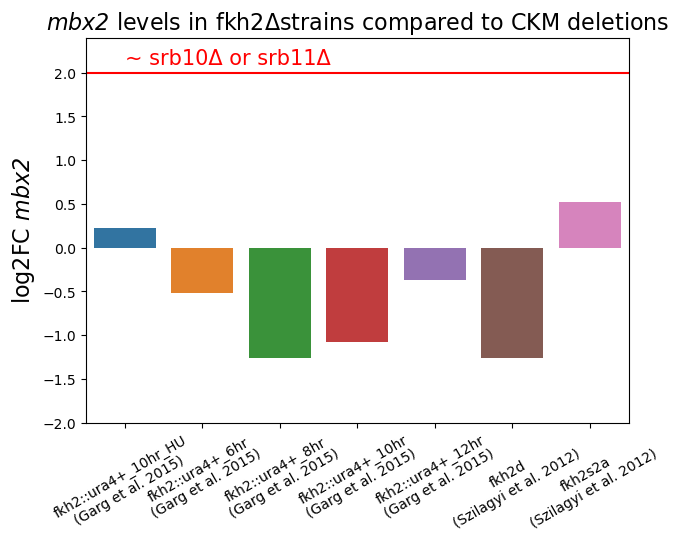

In [23]:
#barplot of SPBC317.01 across cols
subset=final[final['NAME']=='SPBC317.01']
subset = subset.drop(columns=['NAME'])
subset = subset.T
#rename indices by puttin \n before (
subset.index = [col.replace(' (', '\n(') for col in subset.index]
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=subset.index, y=subset[4745], ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=10)
#y axis is log2 FC
ax.set_ylabel( r'$\mathrm{log2FC}$' +' mbx2', fontsize=16, fontstyle='italic')
#title gsf1 expression in YES compared to EMM
ax.set_title('mbx2 ' + r'$\mathrm{levels\ in\ fkh2Δ strains\ compared\ to\ CKM\ deletions}$', fontsize=16, fontstyle='italic')
#draw a red line at 2 and label it as srb10/srb11Δ
ax.axhline(y=2, color='r', linestyle='-')
ax.text(0, 2.1, '~ srb10Δ or srb11Δ', fontsize=15, color='r')
#ylim till 2.3
ax.set_ylim(-2, 2.4)

#save as svg to root + Figures/All figures and as png
plt.savefig(root + 'Figures/All figures/fkh2delete_mbx2_levels.svg', format='svg', dpi=400)
plt.savefig(root + 'Figures/All figures/fkh2delete_mbx2_levels.png', format='png', dpi=400)


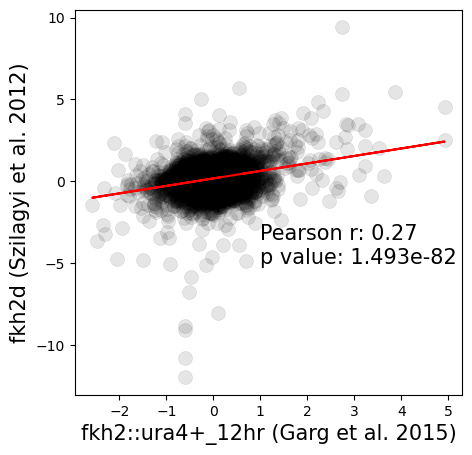

In [ ]:
#plot sixth vs eight col
import scipy.stats as st
plt.figure(figsize=(5,5))
#empty circles
sns.scatterplot(x=final.iloc[:,5], y=final.iloc[:,6], alpha=0.1, s=100, color='black', edgecolor='black', linewidth=0.5)
#labels are the colnames
plt.xlabel(final.columns[5], fontsize=15)
plt.ylabel(final.columns[6], fontsize=15)
#print pval and pearson correlation. Show pval in scientific notation to 3 sig figures
plt.text(1, -5, 'Pearson r: ' + str(round(st.pearsonr(final.iloc[:,4], final.iloc[:,6])[0], 2)) + '\np value: ' + str('{:.3e}'.format(st.pearsonr(final.iloc[:,4], final.iloc[:,6])[1])), fontsize=15)
#calc intercept and slope and draw a line
slope, intercept, r_value, p_value, std_err = st.linregress(final.iloc[:,5], final.iloc[:,6])
plt.plot(final.iloc[:,5], intercept + slope*final.iloc[:,5], 'r', label='fitted line')

plt.savefig(root + 'Figures/All figures/fkh2_studies_corr.svg', format='svg', dpi=400)
plt.savefig(root + 'Figures/All figures/fkh2_studies_corr.png', format='png', dpi=400)